# **Import libararies**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


# **Reading dataset**

In [40]:
dataframe = pd.read_csv('divar_dataset.csv')

In [41]:
dataframe

,latitude,longitude,house_size,manufacture_year,rooms,total_price,price_per_meter
0,35.764554,51.331795,70,1404,1,9.950000e+09,142142000.0
1,35.714086,51.376509,110,1395,2,1.390000e+10,126363000.0
2,35.691591,51.345720,73,1400,2,5.900000e+09,80821000.0
3,35.748265,51.306808,129,1394,3,1.640000e+10,127131000.0
4,35.695528,51.353892,84,1398,2,8.600000e+09,102380000.0
...,...,...,...,...,...,...,...
1269,35.720535,51.156316,74,1403,2,1.600000e+09,21621000.0
1270,35.750345,51.157818,93,1403,2,4.464000e+09,48000000.0
1271,35.702847,51.255550,80,1403,2,3.000000e+09,37500000.0
1272,35.718053,51.182296,100,1403,2,1.400000e+09,14000000.0


# **Dataset overview**

In [42]:
dataframe.head()

,latitude,longitude,house_size,manufacture_year,rooms,total_price,price_per_meter
0,35.764554,51.331795,70,1404,1,9.950000e+09,142142000.0
1,35.714086,51.376509,110,1395,2,1.390000e+10,126363000.0
2,35.691591,51.345720,73,1400,2,5.900000e+09,80821000.0
3,35.748265,51.306808,129,1394,3,1.640000e+10,127131000.0
4,35.695528,51.353892,84,1398,2,8.600000e+09,102380000.0


In [43]:
dataframe.tail()

,latitude,longitude,house_size,manufacture_year,rooms,total_price,price_per_meter
1269,35.720535,51.156316,74,1403,2,1.600000e+09,21621000.0
1270,35.750345,51.157818,93,1403,2,4.464000e+09,48000000.0
1271,35.702847,51.255550,80,1403,2,3.000000e+09,37500000.0
1272,35.718053,51.182296,100,1403,2,1.400000e+09,14000000.0
1273,35.728225,51.185534,100,1403,2,1.500000e+09,15000000.0


In [44]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latitude          1274 non-null   float64
 1   longitude         1274 non-null   float64
 2   house_size        1274 non-null   int64  
 3   manufacture_year  1274 non-null   int64  
 4   rooms             1274 non-null   int64  
 5   total_price       1274 non-null   float64
 6   price_per_meter   1274 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 69.8 KB


In [45]:
dataframe.describe()

,latitude,longitude,house_size,manufacture_year,rooms,total_price,price_per_meter
count,1274.000000,1274.000000,1274.000000,1274.000000,1274.000000,1.274000e+03,1.274000e+03
mean,35.710971,51.371390,79.404239,1393.326531,1.740188,6.903487e+09,8.193811e+07
std,0.036902,0.090128,32.463513,8.257642,0.657904,4.994178e+09,3.540469e+07
min,35.511364,51.019848,32.000000,1371.000000,1.000000,1.000000e+09,7.500000e+06
25%,35.685543,51.306797,56.000000,1386.000000,1.000000,3.100000e+09,5.602425e+07
50%,35.717161,51.364913,71.000000,1394.000000,2.000000,5.500000e+09,7.987300e+07
75%,35.742801,51.452623,95.000000,1400.750000,2.000000,9.637500e+09,1.108482e+08
max,35.808934,51.621072,370.000000,1404.000000,4.000000,4.300000e+10,1.500000e+08


In [46]:
dataframe.isnull().sum()

,0
latitude,0
longitude,0
house_size,0
manufacture_year,0
rooms,0
total_price,0
price_per_meter,0


In [47]:
print(dataframe.duplicated().sum())

0


# **Exploratory Data Analysis And Insights**

In [48]:
dataframe['year_bins'] = (dataframe['manufacture_year']//5) * 5
dataframe['total_price_bilion'] = dataframe['total_price']/1e9




> **This Chart Shows Us Number Of Rooms Per ManufactureYear**   

*   most of the houses in this dataset come with 2 rooms
*   most of the houses with 3 rooms are built in between 1395-1404
*   most of the houses with 1 rooms are belong to the 1385-1395
*   bigger houses are mostly comes with manufacture year of 1397-1404

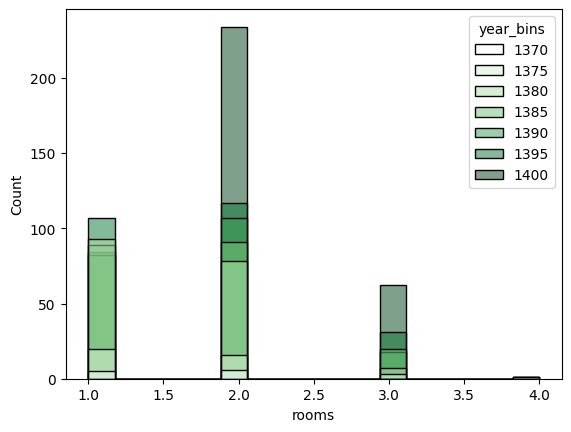

In [49]:
sns.histplot(data=dataframe,x='rooms',kde=False,hue='year_bins',palette='Greens')
plt.show()

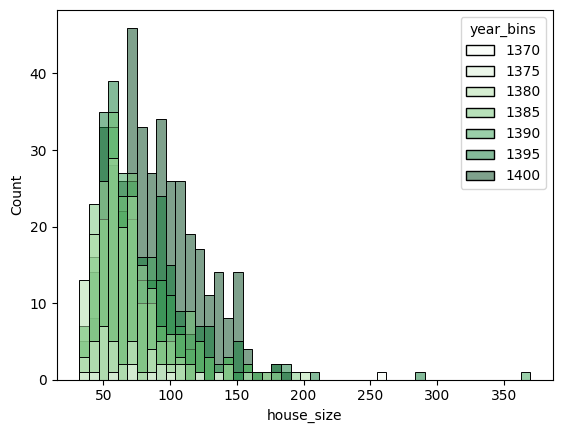

In [50]:
sns.histplot(data=dataframe,x='house_size',kde=False,hue='year_bins',palette='Greens')
plt.show()




> **These Charts are about  the distribution of our features**   

*   most of the houses on **Divar** are between 1403-1404
*   most of the houseSize of **Tehran** is in between 50-110 meters
*   most of the houses of **Tehran** are selled in between 1-10 bilion Toman

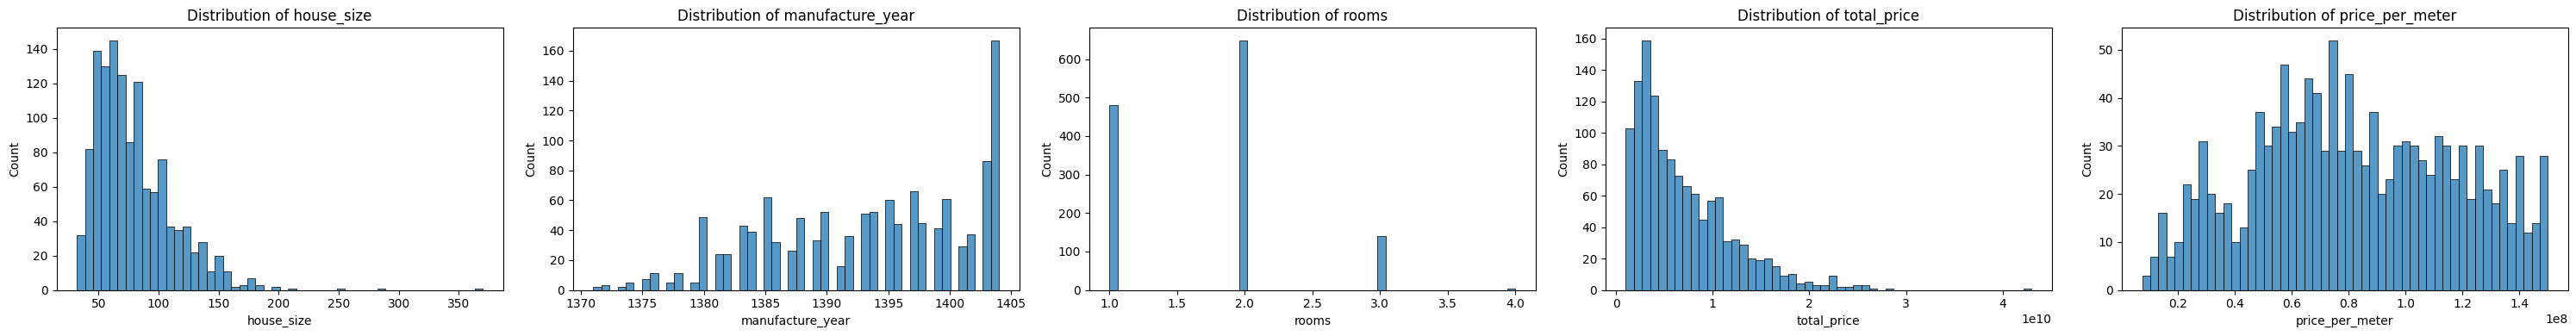

In [51]:

columns = dataframe.columns[2:7]
num_columns = len(columns)
fig,axes = plt.subplots(1,num_columns,figsize=(6 * num_columns, 4))
for i,column in enumerate(columns):
  sns.histplot(data=dataframe,x = column,ax=axes[i],bins=50)
  axes[i].set_title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


> **These Charts are about the correlation between features**   

*  as we see, bigger house comes with more rooms
*  we see a linear-relation between total_price and house_size its says bigger house costs more money

* The last chart shows us that houses built in 1374 and 1395 are more expensive on average, respectively.

<Axes: >

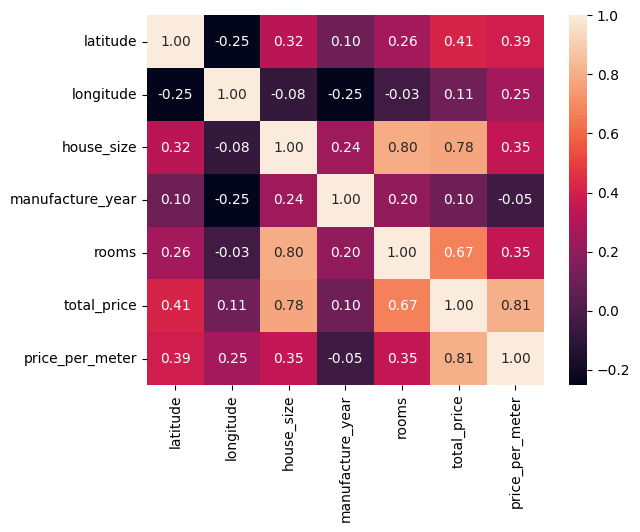

In [52]:
corr_dataframe = dataframe.drop(columns=['year_bins','total_price_bilion'],axis=1)
sns.heatmap(data=corr_dataframe.corr(),fmt='.2f',annot=True)

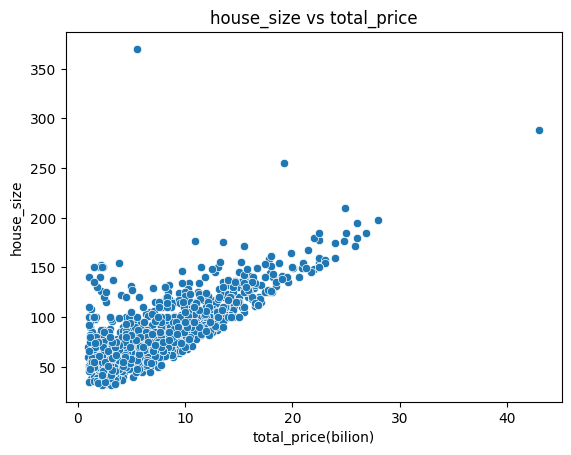

In [53]:
sns.scatterplot(data=dataframe,x='total_price_bilion',y='house_size')
plt.xlabel('total_price(bilion)')
plt.ylabel('house_size')
plt.title('house_size vs total_price')
plt.show()

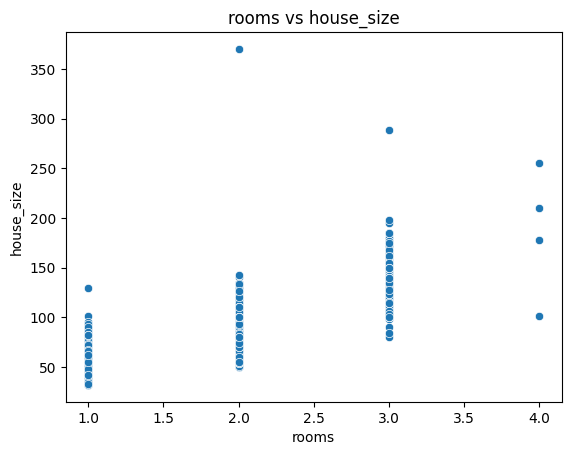

In [54]:
sns.scatterplot(data=dataframe,x='rooms',y='house_size')
plt.xlabel('rooms')
plt.ylabel('house_size')
plt.title('rooms vs house_size')
plt.show()

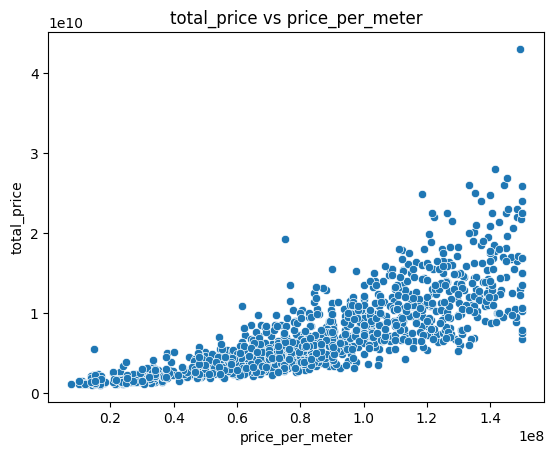

In [55]:
sns.scatterplot(data=dataframe,x='price_per_meter',y='total_price')
plt.xlabel('price_per_meter')
plt.ylabel('total_price')
plt.title('total_price vs price_per_meter')
plt.show()

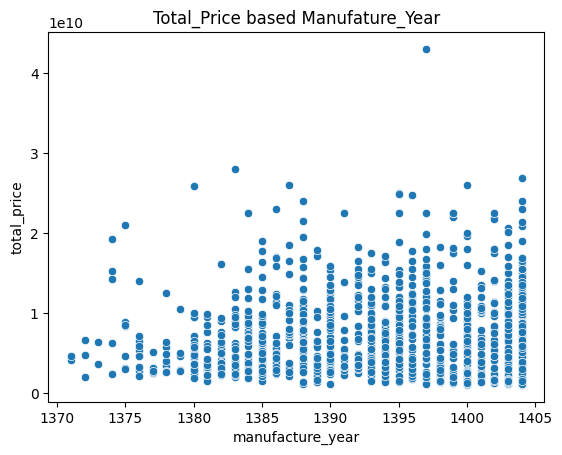

In [56]:
sns.scatterplot(data=dataframe,x='manufacture_year',y='total_price')
plt.xlabel('manufacture_year')
plt.ylabel('total_price')
plt.title('Total_Price based Manufature_Year')
plt.show()

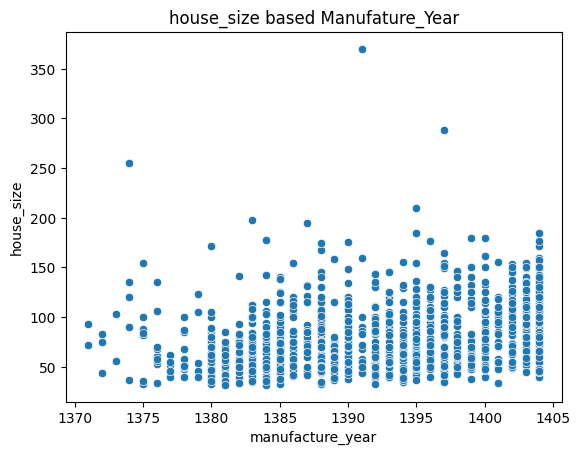

In [57]:
sns.scatterplot(data=dataframe,x='manufacture_year',y='house_size')
plt.xlabel('manufacture_year')
plt.ylabel('house_size')
plt.title('house_size based Manufature_Year')
plt.show()

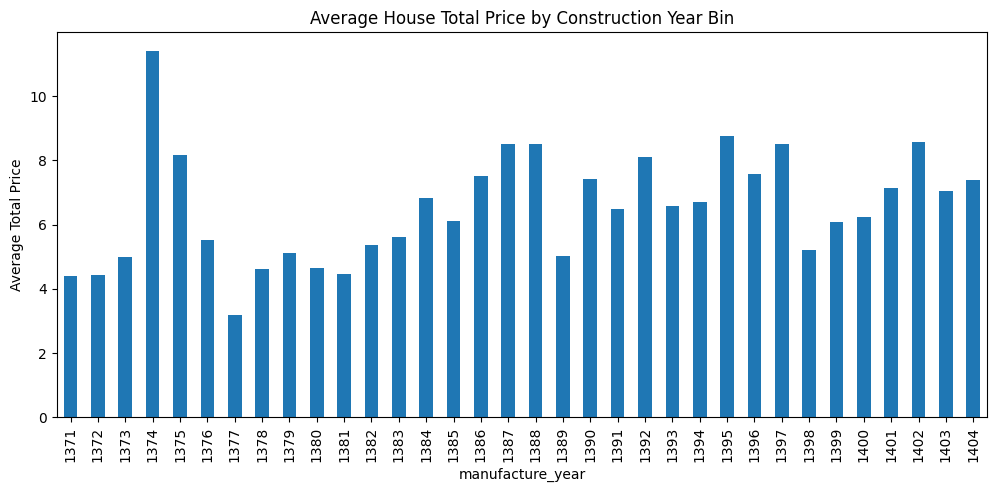

In [58]:
avg_price_by_year = dataframe.groupby('manufacture_year')['total_price_bilion'].mean()
avg_price_by_year.plot(kind='bar', figsize=(12,5))
plt.ylabel("Average Total Price")
plt.title("Average House Total Price by Construction Year Bin")
plt.show()


# **Conclusion of insights**

 most of the ad-houses are **built-in** 1403-1404 , the newer houses has bigger size than older, most of the 100 meter and above house_size is belongs to 1397-1404 ad-houses and with that we know newer houses has more room than old houses in **average**.



#**Modeling**

In [59]:
dataframe

,latitude,longitude,house_size,manufacture_year,rooms,total_price,price_per_meter,year_bins,total_price_bilion
0,35.764554,51.331795,70,1404,1,9.950000e+09,142142000.0,1400,9.950
1,35.714086,51.376509,110,1395,2,1.390000e+10,126363000.0,1395,13.900
2,35.691591,51.345720,73,1400,2,5.900000e+09,80821000.0,1400,5.900
3,35.748265,51.306808,129,1394,3,1.640000e+10,127131000.0,1390,16.400
4,35.695528,51.353892,84,1398,2,8.600000e+09,102380000.0,1395,8.600
...,...,...,...,...,...,...,...,...,...
1269,35.720535,51.156316,74,1403,2,1.600000e+09,21621000.0,1400,1.600
1270,35.750345,51.157818,93,1403,2,4.464000e+09,48000000.0,1400,4.464
1271,35.702847,51.255550,80,1403,2,3.000000e+09,37500000.0,1400,3.000
1272,35.718053,51.182296,100,1403,2,1.400000e+09,14000000.0,1400,1.400


In [60]:
X = dataframe.drop(columns = ['total_price','price_per_meter','year_bins','total_price_bilion'],axis=1)
y = dataframe['total_price']


In [61]:
X

,latitude,longitude,house_size,manufacture_year,rooms
0,35.764554,51.331795,70,1404,1
1,35.714086,51.376509,110,1395,2
2,35.691591,51.345720,73,1400,2
3,35.748265,51.306808,129,1394,3
4,35.695528,51.353892,84,1398,2
...,...,...,...,...,...
1269,35.720535,51.156316,74,1403,2
1270,35.750345,51.157818,93,1403,2
1271,35.702847,51.255550,80,1403,2
1272,35.718053,51.182296,100,1403,2


In [62]:
y

,total_price
0,9.950000e+09
1,1.390000e+10
2,5.900000e+09
3,1.640000e+10
4,8.600000e+09
...,...
1269,1.600000e+09
1270,4.464000e+09
1271,3.000000e+09
1272,1.400000e+09


#**split data into train and test set**

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [64]:
X_train

,latitude,longitude,house_size,manufacture_year,rooms
647,35.671519,51.366902,40,1378,1
370,35.695582,51.257049,56,1384,1
895,35.747820,51.291307,50,1400,1
381,35.747078,51.277683,49,1398,1
467,35.702972,51.256074,67,1404,1
...,...,...,...,...,...
733,35.747325,51.542257,125,1404,2
1180,35.750436,51.303966,88,1388,2
1147,35.660370,51.459620,65,1402,2
527,35.728848,51.473525,33,1375,1


In [65]:
y_train

,total_price
647,2.600000e+09
370,4.150000e+09
895,1.200000e+09
381,1.300000e+09
467,6.030000e+09
...,...
733,1.450000e+10
1180,9.000000e+09
1147,4.600000e+09
527,3.050000e+09


In [66]:
X_test

,latitude,longitude,house_size,manufacture_year,rooms
1004,35.677206,51.384941,65,1396,2
102,35.748991,51.186438,80,1400,1
229,35.697871,51.486153,118,1399,2
987,35.671104,51.365543,100,1403,2
881,35.728957,51.485518,58,1386,1
...,...,...,...,...,...
16,35.720059,51.358698,120,1390,2
859,35.699867,51.365710,51,1400,1
299,35.760300,51.224285,134,1390,3
1049,35.635195,51.386640,70,1383,2


In [67]:
y_test

,total_price
1004,4.500000e+09
102,8.450000e+09
229,1.298000e+10
987,5.520000e+09
881,4.930000e+09
...,...
16,1.150000e+10
859,2.590000e+09
299,1.040000e+10
1049,3.700000e+09


In [68]:
sc = StandardScaler()
X_train[['house_size','manufacture_year']] = sc.fit_transform(X_train[['house_size','manufacture_year']])
X_test[['house_size','manufacture_year']] = sc.transform(X_test[['house_size','manufacture_year']])

In [69]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression()

In [70]:
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score
y_pred = linear_regressor.predict(X_test)

mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mape = np.mean(np.abs((y_test - y_pred)/y_test)) * 100
print("for linear regression\n")
print(f"mae : {mae}")
print(f"rmse : {rmse}")
print(f"mspe : {mape:.2f}%")
print(f"r2Score : {r2}")

for linear regression

mae : 1831908212.9293802
rmse : 2567856049.359701
mspe : 48.71%
r2Score : 0.6576613135055296


In [71]:
random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [72]:
y_pred_r = random_forest_regressor.predict(X_test)

mae = mean_absolute_error(y_test,y_pred_r)
rmse = root_mean_squared_error(y_test,y_pred_r)
r2 = r2_score(y_test,y_pred_r)
mape = np.mean(np.abs((y_test - y_pred_r)/y_test)) * 100
print("for randomForest regression\n")
print(f"mae : {mae}")
print(f"rmse : {rmse}")
print(f"mspe : {mape:.2f}%")
print(f"r2Score : {r2}")

for randomForest regression

mae : 1258213921.5686274
rmse : 2048462591.0756755
mspe : 30.28%
r2Score : 0.7821434075698577
